# LDA
- **L**inear **D**iscriminant **A**nalysis, 선형 판별 분석법
- 분류에서 유리하도록, 각 클래스를 분별할 수 있는 기준을 최대한 유지
- 클래스 간 분산과 클래스 내부 분산의 비율을 최대화하는 방식으로 차원 축소
- PCA와 유사하나 공분산 행렬이 아닌 클래스 간, 클래스 내부 분산 행렬로 차원 축소

## LDA 수행 순서
1. 클래스 내부와 클래스 간 분산 행렬 계산
    - 개별 feature의 평균 벡터를 기반함
2. 클래스 내부 분산 행렬을 $S_W$, 클래스 간 분산 행렬을 $S_B$라 하면 아래와 같이 고유 벡터로 분해할 수 있음
    - $S_W^TS_B=\begin{bmatrix} e_1 | ... | e_n \end{bmatrix} \begin{bmatrix}\lambda_1 & ... & 0\\... & ... & ...\\ 0 & ... & \lambda_n \end{bmatrix} \begin{bmatrix} e_1^T \\ ... \\ e_n^T\end{bmatrix}$
3. 고유값이 큰 순으로 K개 추출
4. 3에서 추출한 고유벡터로 데이터를 변환

In [1]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

### 주의점
- LDA는 클래스 간, 클래스 내부 분산을 계산하기 때문에 target이 있어야함

In [2]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


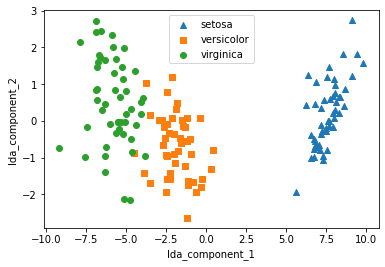

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns = ['lda_component_1', 'lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda, columns=lda_columns)
irisDF_lda['target'] = iris.target

markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
    y_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()